In [1]:
import pandas as pd

In [2]:
actual_df = pd.read_csv('D:/ABINBEV/Actual.csv')
targets_df = pd.read_csv('D:/ABINBEV/Targets.csv')
price_df = pd.read_csv('D:/ABINBEV/Price.csv')
bcr_df = pd.read_csv('D:/ABINBEV/B&CR.csv')

In [3]:
merged_df = pd.merge(actual_df, targets_df, on=['Plant', 'Period', 'Year'], how='left')

In [4]:
merged_df = pd.merge(merged_df, price_df, on=['Plant', 'Material Description'], how='left')

In [5]:
merged_df['Amount in LC'] = pd.to_numeric(merged_df['Amount in LC'], errors='coerce')

In [6]:
merged_df['Quantity'] = pd.to_numeric(merged_df['Quantity'], errors='coerce')

In [7]:
merged_df['Target Value in LC'] = pd.to_numeric(merged_df['Target Value in LC'], errors='coerce')

In [8]:
merged_df['Target Quantity'] = pd.to_numeric(merged_df['Target Quantity'], errors='coerce')

In [9]:
merged_df.rename(columns={' Price per case ': 'Price per case'}, inplace=True)

In [10]:
merged_df['Price per case'] = pd.to_numeric(merged_df['Price per case'], errors='coerce')

In [11]:
merged_df['Actual Rands'] = merged_df['Amount in LC'] * merged_df['Price per case']

In [12]:
merged_df['Target Rands'] = merged_df['Target Value in LC'] * merged_df['Price per case']

In [13]:
merged_df['Variance Rands'] = merged_df['Actual Rands'] - merged_df['Target Rands']

In [14]:
consolidated_view = merged_df[['Material Description', 'Plant', 'Price per case', 'Amount in LC', 'Actual Rands']]

In [15]:
plant_analysis = merged_df.groupby('Plant').agg({
    'Actual Rands': 'sum',
    'Target Rands': 'sum'
})

In [17]:
merged_df['Category'] = ''

In [18]:
merged_df.loc[merged_df['Material Description'].str.contains('Bottle', na=False), 'Category'] = 'Bottle'

In [19]:
merged_df.loc[merged_df['Material Description'].str.contains('Keg', na=False), 'Category'] = 'Keg'

In [20]:
merged_df.loc[merged_df['Material Description'].str.contains('Crate', na=False), 'Category'] = 'Crate'

In [21]:
plant_category_analysis = merged_df.groupby(['Plant', 'Category']).agg({
    'Actual Rands': 'sum',
    'Target Rands': 'sum'
})


In [22]:
plant_category_analysis['Variance Rands'] = plant_category_analysis['Actual Rands'] - plant_category_analysis['Target Rands']

In [23]:
trend_analysis = merged_df.groupby(['Plant', 'Category', 'Material Description']).agg({
    'Actual Rands': 'sum',
    'Target Rands': 'sum'
})

In [24]:
print("Consolidated View of Actuals data:")
print(consolidated_view)

Consolidated View of Actuals data:
                      Material Description Plant  Price per case  \
0       B&CR: 660RB Green Lite & Red Crate    AA       16.919167   
1       B&CR: 660RB Green Lite & Red Crate    AA       16.919167   
2       B&CR: 660RB Green Lite & Red Crate    AA       16.919167   
3       B&CR: 660RB Green Lite & Red Crate    AA       16.919167   
4       B&CR: 660RB Green Lite & Red Crate    AA       16.919167   
...                                    ...   ...             ...   
370573                      Keg: 50L Empty    AG      263.260833   
370574                      Keg: 30L Empty    AG      263.260833   
370575                      Keg: 50L Empty    AG      263.260833   
370576                      Keg: 30L Empty    AG      263.260833   
370577                      Keg: 50L Empty    AG      263.260833   

         Amount in LC  Actual Rands  
0         6659.400000  1.126715e+05  
1         6659.400000  1.126715e+05  
2         6659.400000  1.126715e+0

In [25]:
print("\nActuals & Target Analysis by Plant:")
print(plant_analysis)


Actuals & Target Analysis by Plant:
       Actual Rands  Target Rands
Plant                            
AA     1.002407e+10  3.176508e+11
AB     1.501989e+09  8.530582e+09
AC     3.568867e+09  4.164527e+10
AD     3.466555e+09  3.841189e+10
AE     4.889696e+09  1.640457e+11
AF     9.616265e+08  8.560560e+09
AG     8.316892e+09  2.254530e+11


In [26]:
print("Actuals, Target & Variance Analysis by Plant & Category:")
print(plant_category_analysis)

Actuals, Target & Variance Analysis by Plant & Category:
                Actual Rands  Target Rands  Variance Rands
Plant Category                                            
AA    Crate     1.002407e+10  3.176508e+11   -3.076268e+11
AB              2.680746e+06  2.185082e+08   -2.158275e+08
      Bottle    7.916530e+07  7.704442e+08   -6.912789e+08
      Crate     1.420143e+09  7.541629e+09   -6.121486e+09
AC              1.281894e+06  0.000000e+00    1.281894e+06
      Crate     2.812982e+09  4.164527e+10   -3.883228e+10
      Keg       7.546025e+08  0.000000e+00    7.546025e+08
AD    Crate     2.686483e+09  3.841189e+10   -3.572541e+10
      Keg       7.800721e+08  0.000000e+00    7.800721e+08
AE    Crate     3.762421e+09  1.640457e+11   -1.602833e+11
      Keg       1.127275e+09  0.000000e+00    1.127275e+09
AF              6.978792e+06  4.790166e+07   -4.092287e+07
      Crate     9.546477e+08  8.512658e+09   -7.558011e+09
AG    Bottle    5.717800e+06  0.000000e+00    5.717800e+06

In [27]:
print("\nActuals, Target & Variance Analysis by Plant & Category:")
print(trend_analysis)


Actuals, Target & Variance Analysis by Plant & Category:
                                                         Actual Rands  \
Plant Category Material Description                                     
AA    Crate    B&CR: 1000RB Amber & 1L Brown Crate       1.479992e+09   
               B&CR: 660RB Green Lite & Red Crate        2.316150e+09   
               B&CR: 750RB Amber Calabash & Brown Crate  6.255779e+09   
               Crate: 1L Brown                          -4.975160e+06   
               Crate: Brown Quart                       -1.630623e+07   
...                                                               ...   
AG    Crate    Crate: Brown Quart                        2.334273e+06   
               Crate: Navy Quart                        -1.861188e+04   
               Crate: Red Quart                          2.586373e+04   
      Keg      Keg: 30L Empty                            3.264188e+08   
               Keg: 50L Empty                            1.129315e

<Figure size 1000x600 with 0 Axes>

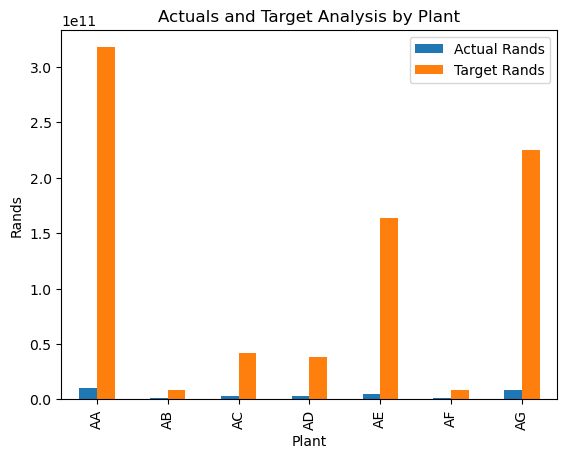

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plant_analysis.plot(kind='bar')
plt.title('Actuals and Target Analysis by Plant')
plt.xlabel('Plant')
plt.ylabel('Rands')
plt.show()

<Figure size 1200x600 with 0 Axes>

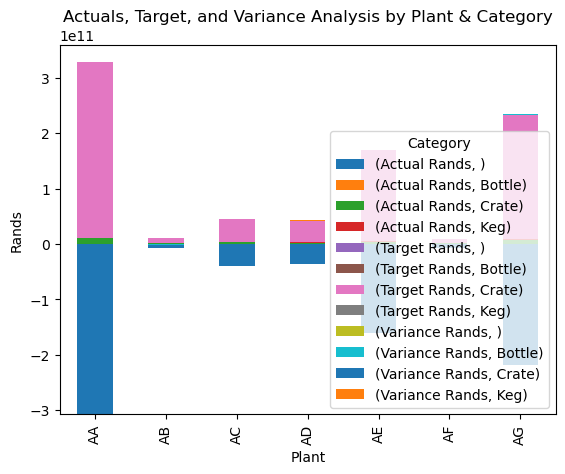

In [30]:
import seaborn as sns
pivot_analysis = plant_category_analysis.reset_index().pivot(index='Plant', columns='Category')
plt.figure(figsize=(12, 6))
pivot_analysis.plot(kind='bar', stacked=True)
plt.title('Actuals, Target, and Variance Analysis by Plant & Category')
plt.xlabel('Plant')
plt.ylabel('Rands')
plt.legend(title='Category')
plt.show()

In [34]:
grouped_trend_analysis = trend_analysis.groupby(['Plant', 'Category']).mean()

In [35]:
unstacked_trend_analysis = grouped_trend_analysis.unstack()

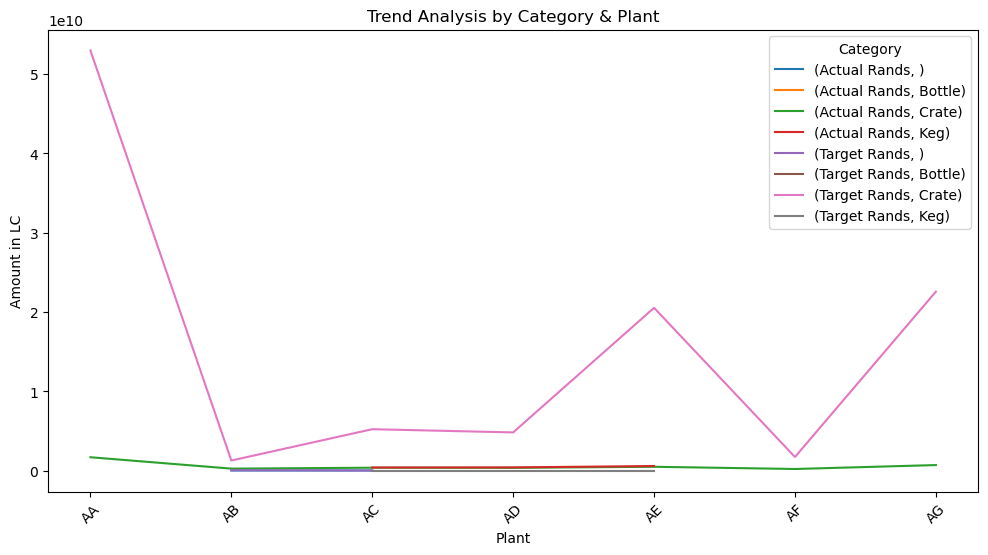

In [37]:
unstacked_trend_analysis.plot(kind='line', figsize=(12, 6))
plt.title('Trend Analysis by Category & Plant')
plt.xlabel('Plant')
plt.ylabel('Amount in LC')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()